In [ ]:
# Versão da Linguagem Python
from platform import python_version

print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [5]:
# Carrega o dataset
df_dsa = pd.read_csv('files/dataset.csv')

In [5]:
# Shape
df_dsa.shape

(9700, 11)

In [6]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [9]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [10]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [11]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [12]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [13]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [8]:
high_sales = df_dsa[df_dsa['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum().sort_values(
    ascending=False)
high_sales

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

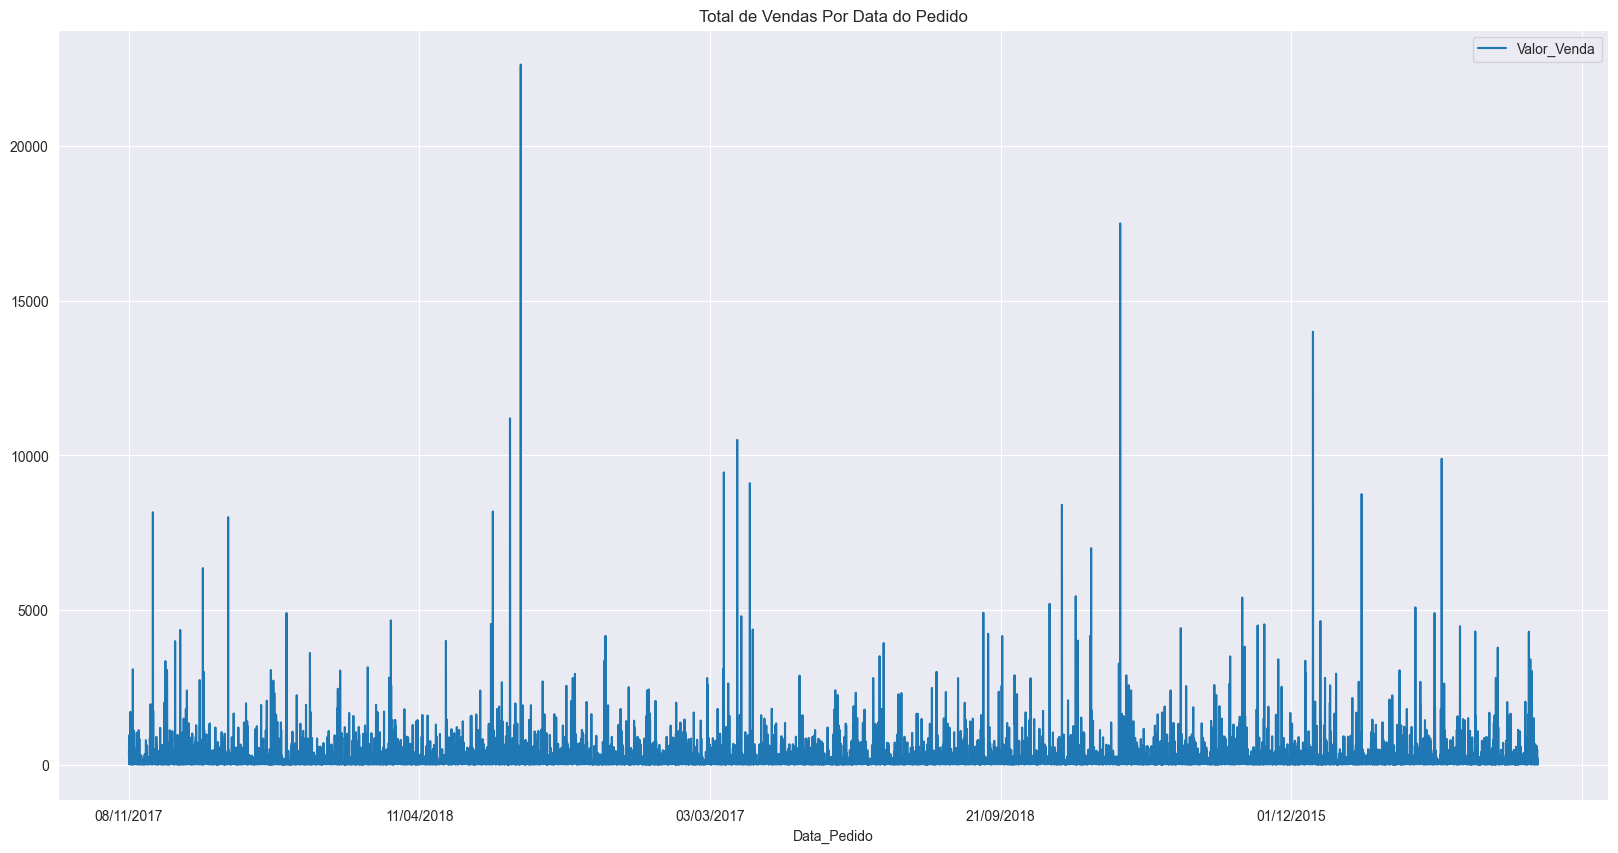

In [10]:
sales_per_date = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

df_dsa.plot(x='Data_Pedido', y='Valor_Venda', figsize=(20, 10), grid=True)
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

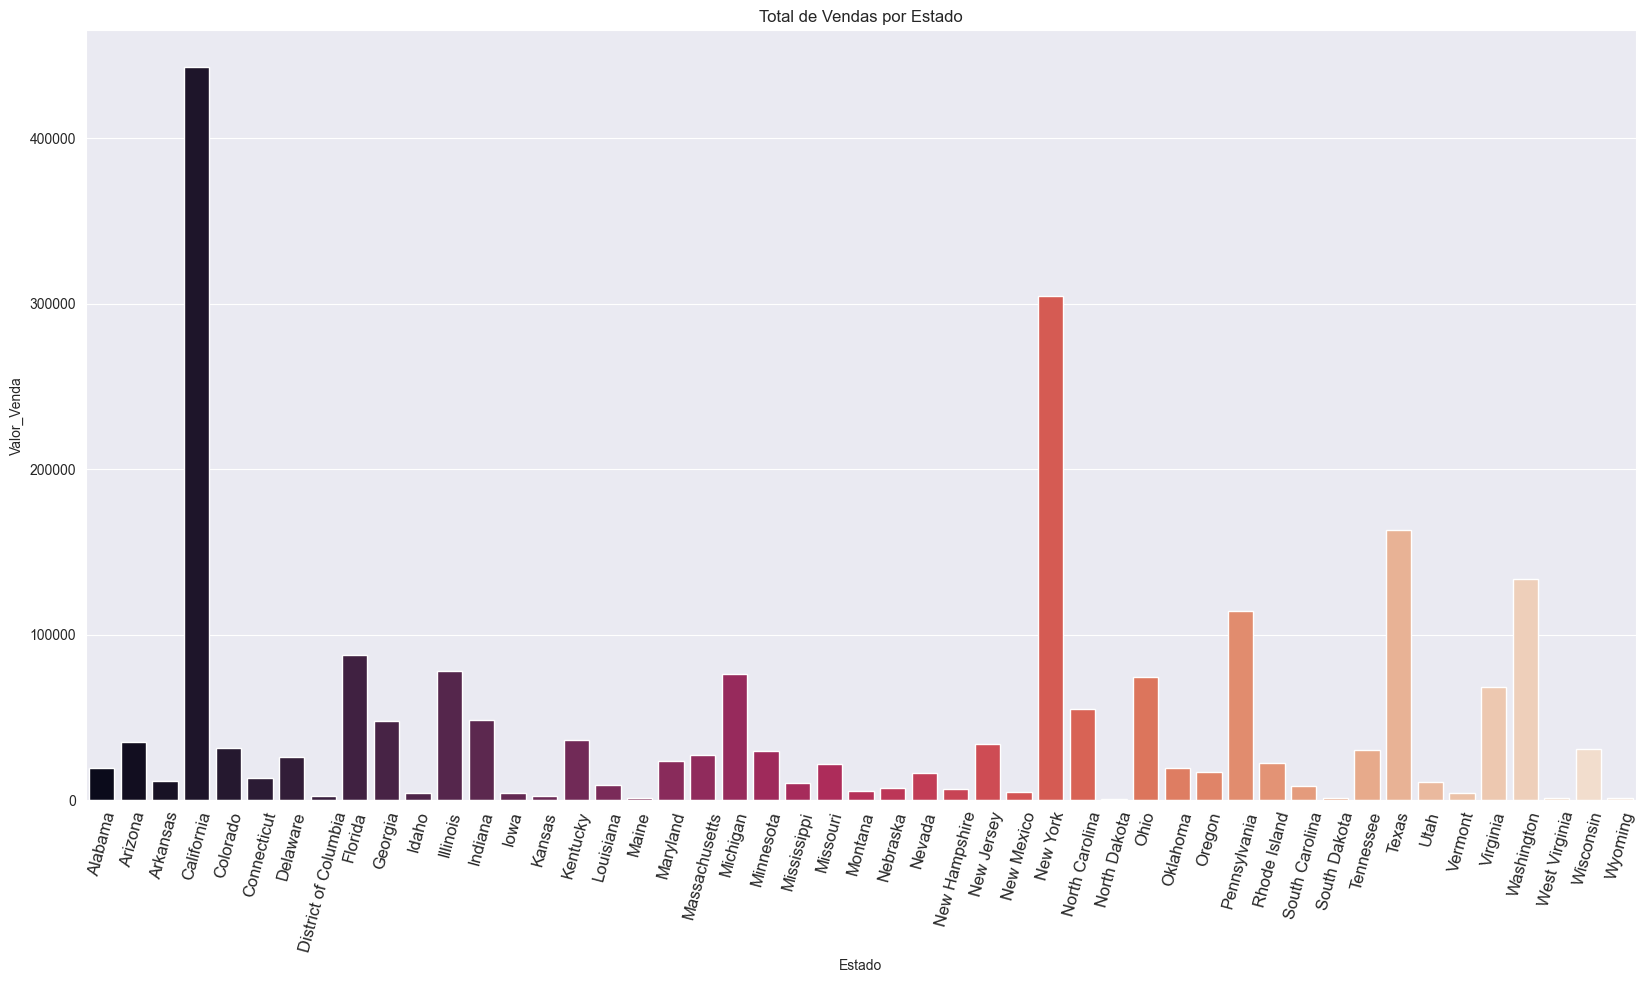

In [29]:
sales_per_state = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

plt.figure(figsize=(20, 10))

sns.barplot(data=sales_per_state,
            x='Estado',
            y='Valor_Venda',
            palette='rocket').set_title('Total de Vendas por Estado')

plt.xticks(rotation=75, fontsize=12);

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

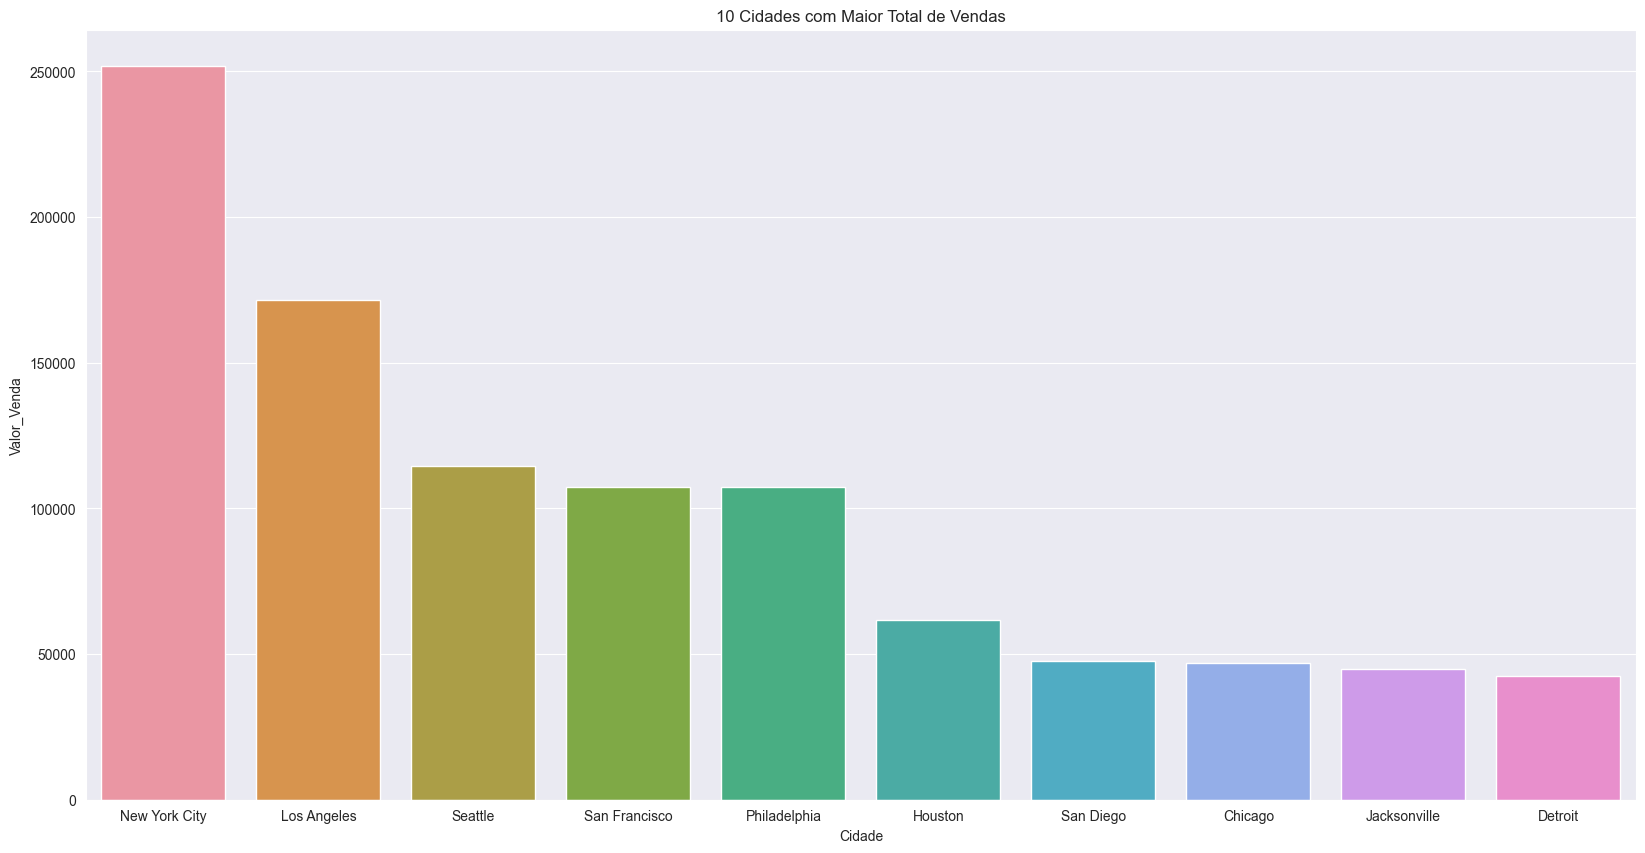

In [58]:
biggest_sales_per_city = (df_dsa.groupby('Cidade')['Valor_Venda'].sum()
                          .reset_index().sort_values(by='Valor_Venda', ascending=False).head(10))

plt.figure(figsize=(20, 10))
sns.set_palette('rocket')
sns.barplot(data=biggest_sales_per_city.reset_index(),
            x='Cidade',
            y='Valor_Venda').set_title('10 Cidades com Maior Total de Vendas');

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [62]:
sales_per_segment = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda',
                                                                                              ascending=False)

sales_per_segment.head(10)

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [44]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v=val)

    return my_format

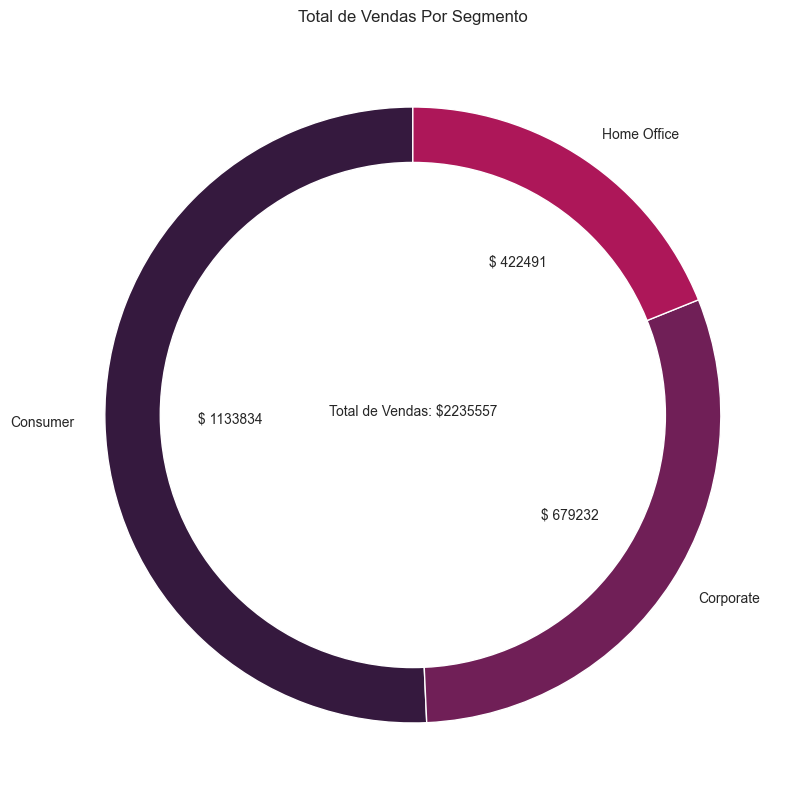

In [77]:
plt.figure(figsize=(20, 10))

plt.pie(sales_per_segment['Valor_Venda'],
        labels=sales_per_segment['Segmento'],
        autopct=autopct_format(sales_per_segment['Valor_Venda']),
        startangle=90)

centre_circle = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.annotate('Total de Vendas: $' + str(int(sales_per_segment['Valor_Venda'].sum())),
             xy=(0, 0),
             ha='center')
plt.title('Total de Vendas Por Segmento')
plt.show();

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

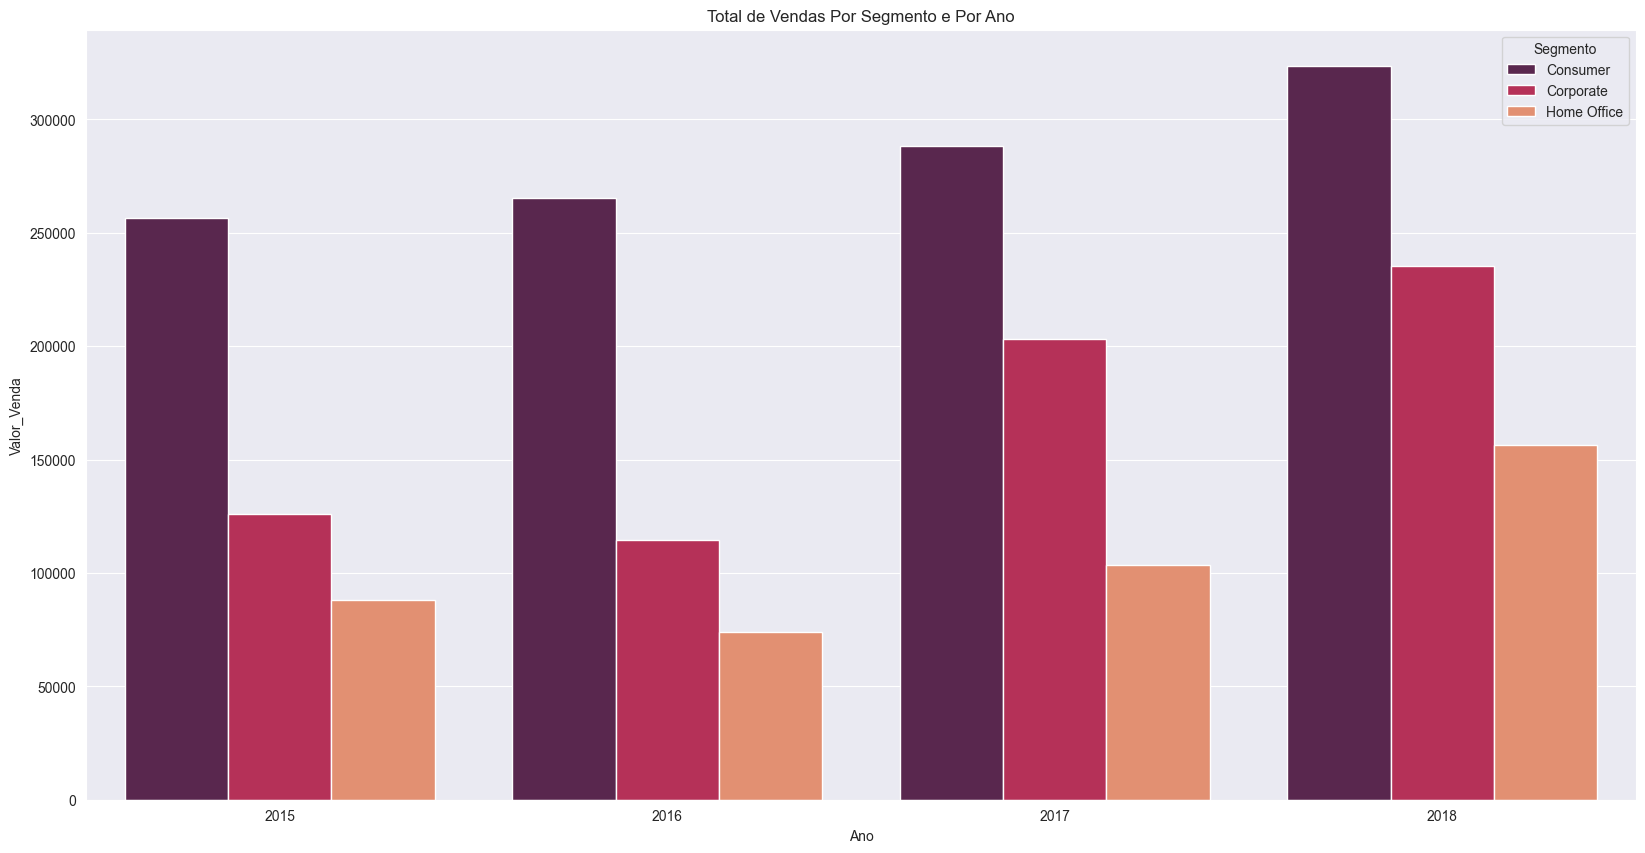

In [13]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst=True)

df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year

sales_per_segment_year = df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum().reset_index().sort_values(
    by='Valor_Venda', ascending=False)

plt.figure(figsize=(20, 10))

sns.barplot(data=sales_per_segment_year,
            x=sales_per_segment_year['Ano'],
            y='Valor_Venda',
            hue='Segmento',
            palette='rocket').set_title('Total de Vendas Por Segmento e Por Ano');

In [98]:
sales_per_segment_year_2 = df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

sales_per_segment_year_2

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [10]:
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.1)
df_dsa['Valor_Desconto'] = df_dsa['Valor_Venda'] * df_dsa['Desconto']
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1,26.19600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1,73.19400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1,1.46200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1,95.75775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1,2.23680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,0.1,2.28300
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,0.1,5.43200
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,0.1,19.67760
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,0.1,0.36200


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [24]:
df_dsa['Valor_Final'] = round(df_dsa['Valor_Venda'] - df_dsa['Valor_Desconto'], 4)
mean_before_discount = np.where(df_dsa['Desconto'] == 0.15, df_dsa['Valor_Venda'], 0).mean()
mean_before_discount = round(mean_before_discount, 4)

mean_after_discount = np.where(df_dsa['Desconto'] == 0.15, df_dsa['Valor_Final'], 0).mean()
mean_after_discount = round(mean_after_discount, 4)

mean_before_discount

99.73

In [25]:
mean_after_discount

84.7705

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

<Figure size 2000x1000 with 0 Axes>

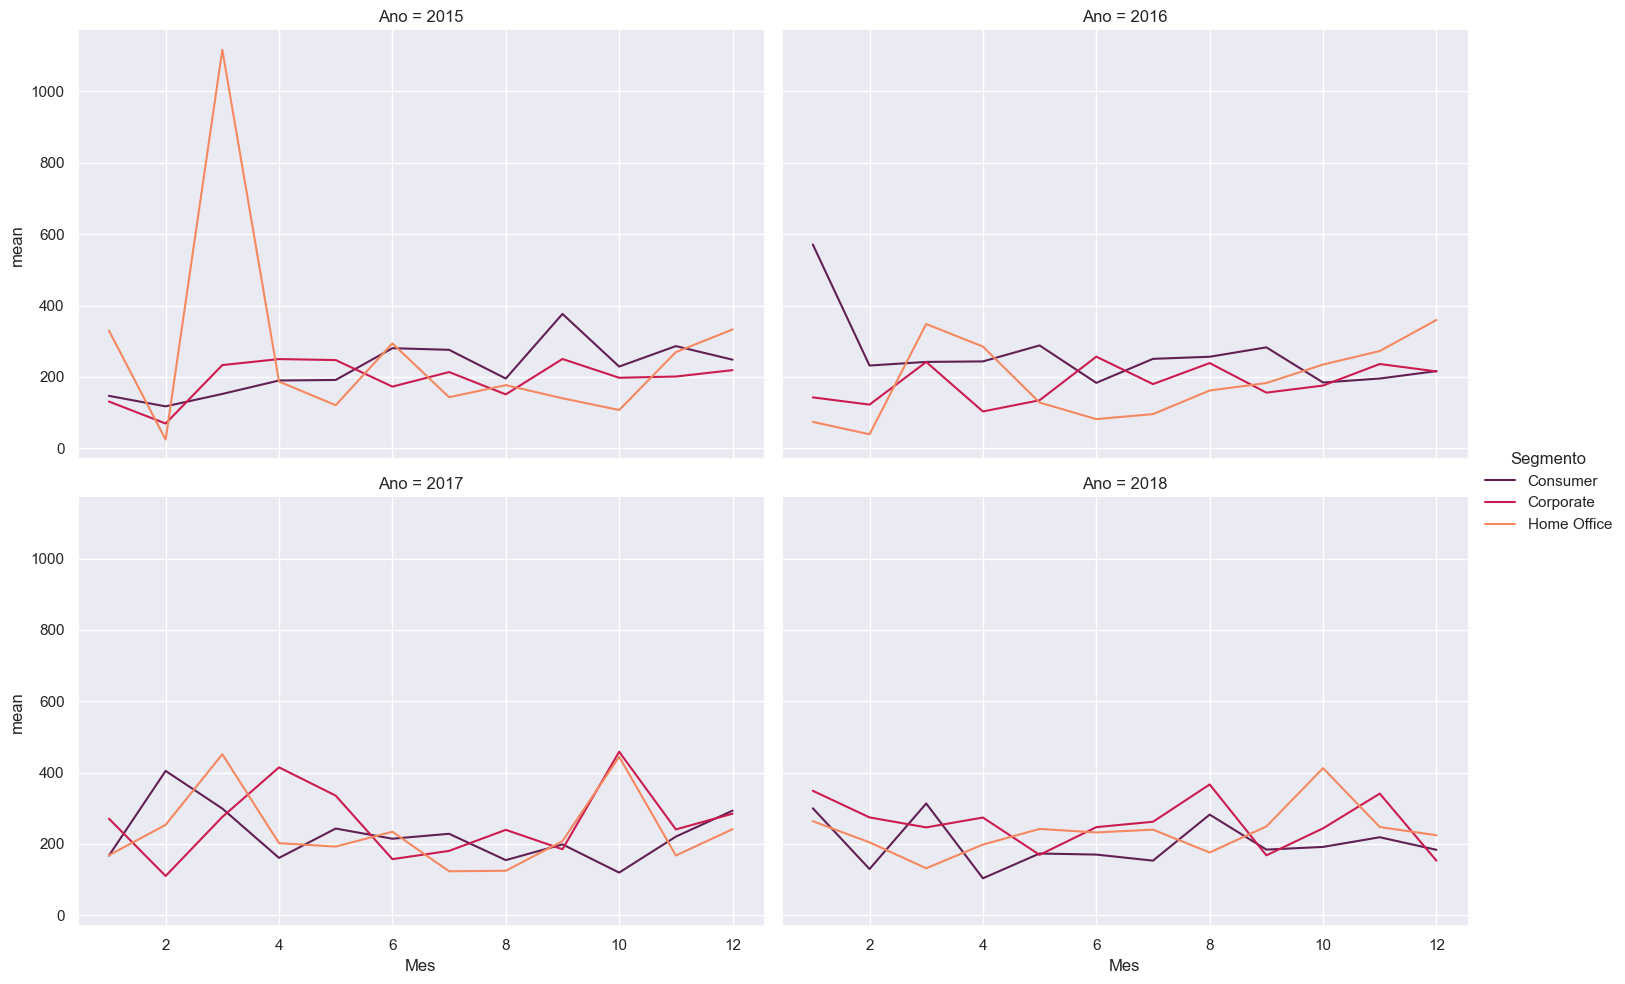

In [32]:
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month
mean_by_segment_year_month = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

plt.figure(figsize=(20, 10))
sns.set()
mean_by_segment_year_month_fig = sns.relplot(data=mean_by_segment_year_month,
                                             x=mean_by_segment_year_month.index.get_level_values(1),
                                             y='mean',
                                             hue='Segmento',
                                             col='Ano',
                                             kind='line',
                                             palette='rocket',
                                             col_wrap=2,
                                             height=5,
                                             aspect=1.5,
                                             legend='full')
plt.show();

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [42]:
total_sales_by_category_subcategory = df_dsa.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().reset_index()
total_sales_by_category_subcategory = total_sales_by_category_subcategory.sort_values(by='Valor_Venda',
                                                                                      ascending=False).head(12)
total_sales_by_category_subcategory

,Categoria,SubCategoria,Valor_Venda
16,Technology,Phones,325271.2940
1,Furniture,Chairs,317919.6250
11,Office Supplies,Storage,216188.3620
3,Furniture,Tables,202083.3600
6,Office Supplies,Binders,194723.3810
15,Technology,Machines,189238.6310
13,Technology,Accessories,162791.3620
14,Technology,Copiers,146248.0940
0,Furniture,Bookcases,108045.0467
4,Office Supplies,Appliances,104061.6930


In [50]:
total_sales_by_category_subcategory_2 = df_dsa.groupby(['Categoria', 'SubCategoria']).sum(
    numeric_only=True).sort_values('Valor_Venda', ascending=False).head(12)

total_sales_by_category_subcategory_2 = total_sales_by_category_subcategory_2[['Valor_Venda']].astype(
    'int').sort_values(by='Categoria').reset_index()

total_sales_by_category_subcategory_2

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [51]:
total_sales_by_category_subcategory_2_category = total_sales_by_category_subcategory_2.groupby('Categoria').sum(
    numeric_only=True).reset_index()

total_sales_by_category_subcategory_2_category

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


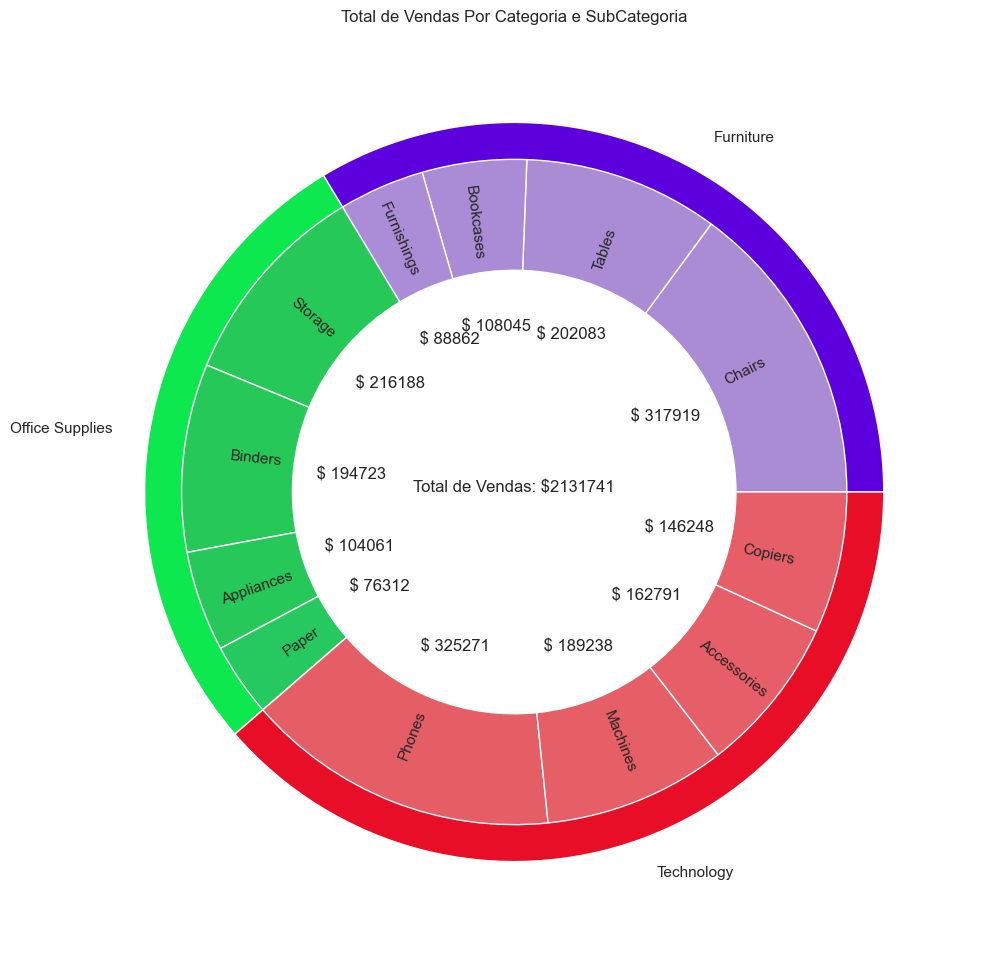

In [58]:
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

fig, ax = plt.subplots(figsize=(20, 12))

p1 = ax.pie(total_sales_by_category_subcategory_2_category['Valor_Venda'],
            radius=1,
            labels=total_sales_by_category_subcategory_2_category['Categoria'],
            wedgeprops=dict(width=0.3, edgecolor='w'),
            colors=cores_categorias)

p2 = ax.pie(total_sales_by_category_subcategory_2['Valor_Venda'],
            radius=0.9,
            labels=total_sales_by_category_subcategory_2['SubCategoria'],
            labeldistance=0.7,
            wedgeprops=dict(width=0.3, edgecolor='w'),
            colors=cores_subcategorias,
            autopct=autopct_format(total_sales_by_category_subcategory_2['Valor_Venda']),
            pctdistance=0.5,
            rotatelabels=True)

centre_circle = plt.Circle((0, 0), 0.5, fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text='Total de Vendas: $' + str(total_sales_by_category_subcategory_2['Valor_Venda'].sum()),
             xy=(0, 0),
             ha='center')
plt.title('Total de Vendas Por Categoria e SubCategoria')
plt.show();


# Fim